# Analysis of the 2 paired pulses for voltage clamp data

In [1]:
import sys
sys.path.append("../")
import glob
from Linearity import Neuron
import numpy as np
import scipy.stats as ss
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import findfont, FontProperties
matplotlib.rcParams['text.usetex'] = False
matplotlib.rc('text.latex', preamble=r'\usepackage{cmbright}')
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.style.use('neuron')
from pickle import dump

In [2]:
def simpleaxis(axes, every=False, outward=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if (outward):
            ax.spines['bottom'].set_position(('outward', 10))
            ax.spines['left'].set_position(('outward', 10))
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [3]:
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [4]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [5]:
dirnames = ['/media/sahil/NCBS_Shares_BGStim/patch_data/190220/c2/']

In [6]:
neurons = []
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex + '_cpa.pkl'
    neurons.append(Neuron.load(filename))
n = neurons[0]

## Looking at average difference between self and non-self square combinations presented in the first and second squares.

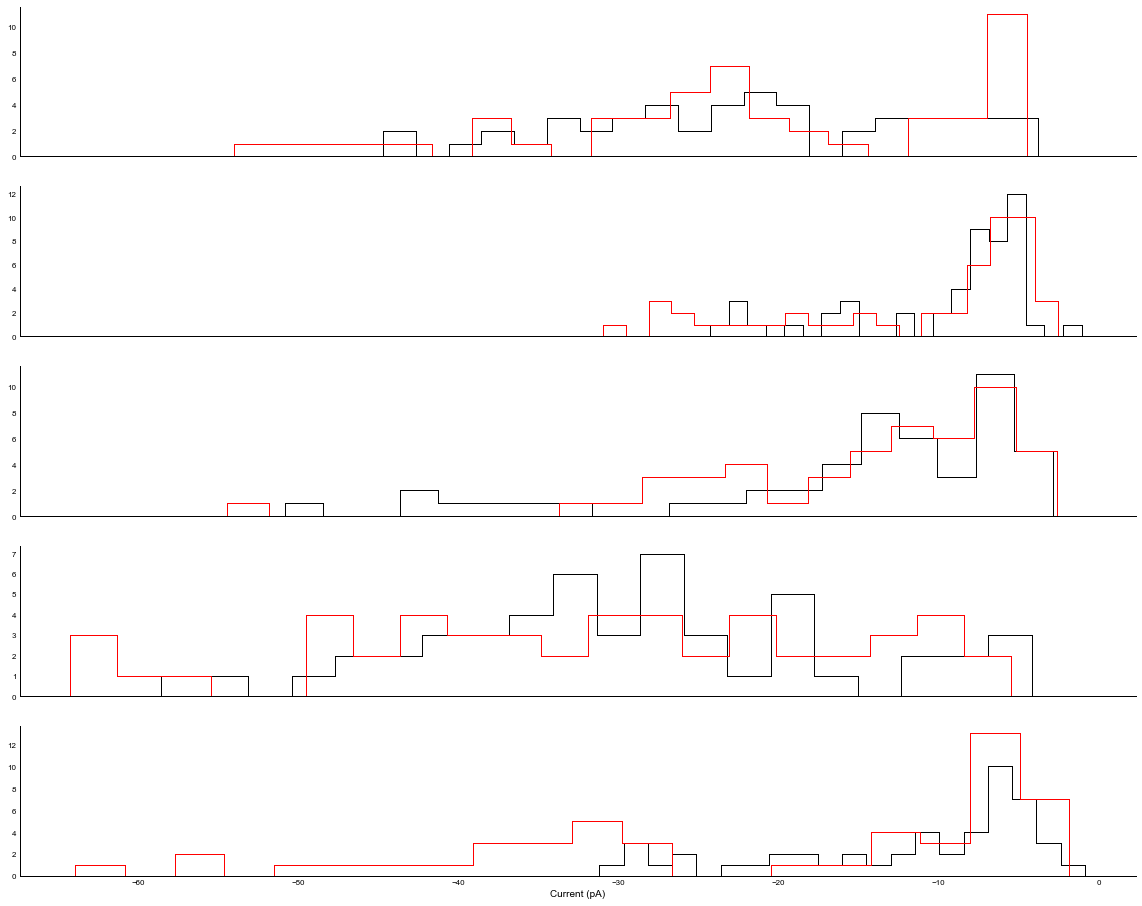

In [9]:
feature=5
colorarr = ['','k','r']

pairedCoords = {}
all_ppa = []
same_ppa = []

paired_coords = {}
numPairs = 25
bins=20
scalingFactor = 1e9
enum=1

commonCoordList = list(set(n.experiment[enum,1][1].coordwise).intersection(n.experiment[enum,2][1].coordwise))

fig, ax = plt.subplots(nrows=len(commonCoordList), sharex=True)
for expType in n.experiment.keys():
#     if expType == enum:
        for j, coord in enumerate(set(n.experiment[enum,1][1].coordwise).intersection(n.experiment[enum,2][1].coordwise)):
#             print(coord, n.experiment[2][1].coordwise[coord].average_feature[feature]/n.experiment[1][1].coordwise[coord].average_feature[feature])
            second_ppa = [trial.feature[feature]*scalingFactor for trial in n.experiment[enum,2][1].coordwise[coord].trials]
            first_ppa = [trial.feature[feature]*scalingFactor for trial in n.experiment[enum,1][1].coordwise[coord].trials]
            ax[j].hist(second_ppa, histtype='step', color='k',bins=bins)
            ax[j].hist(first_ppa, histtype='step', color='r',bins=bins)
ax[j].set_xlabel("Current (pA)")
simpleaxis(ax)
fig.set_figwidth(20)
fig.set_figheight(16)
plt.show()

In [11]:
coord_arr = n.experiment[enum,1][1].coordwise.keys()

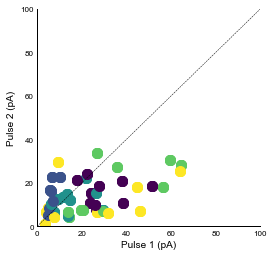

In [14]:
feature=5
colorarr = ['','k','r']
color_coord = { coord_arr[index]: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,5)))}

pairedCoords = {}
all_ppa = []
same_ppa = []

paired_coords = {}
numPairs = 25

same_pairs = 0
same_pair_list = []

xcoords, ycoords = [], []

ppaMat = np.zeros((5,5))
# for trialNum in n.experiment[(1,1)][1].trial:
#     if 
enum=1
fig, ax = plt.subplots()
for expType in n.experiment.keys():
#     if expType[0] == enum:
        for index_0,index_1 in zip(n.experiment[enum,1][1].trial, n.experiment[enum,2][1].trial):
            
            coord1 = n.experiment[enum,1][1].trial[index_0].coord
            coord2 = n.experiment[enum,2][1].trial[index_1].coord
            coord1_, coord2_ = list(coord1[0]), list(coord2[0])
            xcoords+=[coord1_[0], coord2_[0]]
            ycoords+=[coord1_[1], coord2_[1]]
            
            xcoord = coord_arr.index(coord1)
            ycoord = coord_arr.index(coord2)
            
            ppaMat[xcoord, ycoord] = n.experiment[enum,2][1].coordwise[coord2].average_feature[feature]/n.experiment[enum,1][1].coordwise[coord2].average_feature[feature]
            time = np.linspace(0,len(n.experiment[enum,1][1].trial[index_0].interestWindow)/20.,len(n.experiment[enum,1][1].trial[index_0].interestWindow))
            if coord1==coord2:
#                 ax.plot(time, n.experiment[(1,1)][1].trial[index_0].interestWindow, c='k')
#                 ax.plot(time[-1]+time, n.experiment[(1,2)][1].trial[index_1].interestWindow, c='r')
#                 ax.plot(-n.experiment[(1,1)][1].coordwise[coord1].average_feature[feature]*1e9, -n.experiment[(1,2)][1].coordwise[coord2].average_feature[feature]*1e9, 'o')
                ax.plot(-n.experiment[enum,1][1].trial[index_0].feature[feature]*1e9, -n.experiment[enum,2][1].trial[index_1].feature[feature]*1e9, 'o', color=color_coord[coord1])
                
                same_pairs+=1
                same_pair_list.append((n.experiment[enum,1][1].trial[index_0].feature[feature], n.experiment[enum,2][1].trial[index_1].feature[feature]))
#             if (1,coord1, coord2) not in paired_coords:
#                 paired_coords[(1, coord1, coord2)] = [n.experiment[(1,1)][1].trial[index_0]]
#             else:
#                 paired_coords[(1, coord1, coord2)].append(n.experiment[(1,1)][1].trial[index_0])
                
#             all_ppa.append(n.experiment[(1,2)][1].trial[index_1].feature[feature] / n.experiment[(1,1)][1].trial[index_0].feature[feature])
#             if n.experiment[(1,1)][1].trial[index_0].coord ==  n.experiment[(1,2)][1].trial[index_1].coord:
#                 print (n.experiment[(1,1)][1].trial[index_0].coord)
#                 same_ppa.append(n.experiment[(1,2)][1].trial[index_1].feature[feature] / n.experiment[(1,1)][1].trial[index_0].feature[feature])

ax.plot([0, 1], [0, 1], '--', transform=ax.transAxes)
simpleaxis(ax)
ax.set_xlabel("Pulse 1 (pA)")
ax.set_ylabel("Pulse 2 (pA)")
ax.set_xlim(xmin=0, xmax= 100)
ax.set_ylim(ymin=0, ymax= 100)
fig.set_figwidth(4)
fig.set_figheight(4)
plt.show()


In [15]:
def euclidDist(vector1, vector2):
    '''calculate the euclidean distance, no numpy
    input: numpy.arrays or lists
    return: euclidean distance
    '''
    dist = [(a - b)**2 for a, b in zip(vector1, vector2)]
    dist = np.sqrt(sum(dist))
    return dist

In [16]:
def emptyListofLists(size):
    emptyList = []
    for j in range(size[0]):
        emptyList.append([])
        for k in range(size[1]):
            emptyList[j].append([])
    return emptyList

In [17]:
allMat = emptyListofLists((5,5))
dist = np.zeros((5,5))

for expType in n.experiment.keys():
    if expType[0] == 1:
        for index_0,index_1 in zip(n.experiment[(1,1)][1].trial, n.experiment[1,2][1].trial):
            
            coord1 = n.experiment[(1,1)][1].trial[index_0].coord
            coord2 = n.experiment[(1,2)][1].trial[index_1].coord
            
            xcoord = coord_arr.index(coord1)
            ycoord = coord_arr.index(coord2)
            
            dist[xcoord, ycoord] = euclidDist(list(coord1[0]), list(coord2[0]))
            allMat[xcoord][ycoord].append(n.experiment[(1,2)][1].trial[index_1].feature[feature]/n.experiment[(1,1)][1].coordwise[coord2].average_feature[feature])

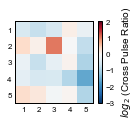

In [26]:
meanPPA = np.mean(allMat,axis=2)
varPPA = np.var(allMat,axis=2)

meanPPA_log = np.log2(meanPPA)
fig, ax = plt.subplots()
cbar = ax.pcolormesh(meanPPA_log, cmap=matplotlib.cm.RdBu_r, norm=MidpointNormalize(midpoint=0.,vmin=-3, vmax=2))
ax.invert_yaxis()
for axis in [ax.xaxis, ax.yaxis]:
    axis.set_ticks(np.arange(1,6), minor=True)
    axis.set(ticks=np.arange(0,5,1)+0.5, ticklabels=np.arange(1,6,1)) #Skipping square labels

cbar = plt.colorbar(cbar, label="$log_2$ (Cross Pulse Ratio)")
fig.set_figwidth(1.75)
fig.set_figheight(1.5)
plt.savefig("/media/sahil/NCBS_Shares_BGStim/Paper/Submissions/Elife/Figures/PPA_heatmap.svg")
plt.show()

In [19]:
distVec, ppaVec, varVec = dist.flatten(), meanPPA.flatten(), varPPA.flatten()
coordVec = coord_arr*5
colorVec = [color_coord[coord] for coord in coordVec]

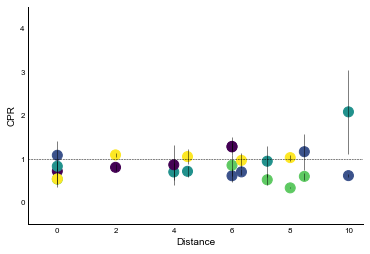

In [20]:
fig, ax = plt.subplots()
ax.scatter(distVec, ppaVec, c=colorVec)
ax.errorbar(distVec, ppaVec, yerr=varVec, markersize=0., fmt='o', alpha=1.)
ax.hlines(y=1.,xmin=-1,xmax=11, linestyles='--')
ax.set_xlim(-1., 10.5)
ax.set_ylim(-0.5, 4.5)
simpleaxis(ax)
ax.set_xlabel("Distance")
ax.set_ylabel("CPR")
plt.show()